# 代码步骤
* 加载数据集
* 检查数据集的格式
* 数据可视化
* 数据预处理
* input-->Conv-->ReLU-->Pool-->Conv-->ReLU-->Pool-->FC-->Output
* 编译模型
* 训练模型
* 模型的评估
* 模型预测

## 01_加载数据集

In [1]:
# npz文件实际上是numpy数据的二进制压缩包/mnist.npz 手写数字识别的二进制文件
import numpy as np
f=np.load('./mnist.npz')
x_train,y_train=f['x_train'],f['y_train']
x_test,y_test=f['x_test'],f['y_test']
f.close()

## 02_检查数据集的格式，维度

In [2]:
print("训练集的训练数据维度{}".format(x_train.shape))
print("训练集的结果标签维度{}".format(y_train.shape))
print("测试集的训练数据维度{}".format(x_test.shape))
print("测试集的结果标签维度{}".format(y_test.shape))

训练集的训练数据维度(60000, 28, 28)
训练集的结果标签维度(60000,)
测试集的训练数据维度(10000, 28, 28)
测试集的结果标签维度(10000,)


## 数据的可视化，抽查一下数据

<IPython.core.display.Javascript object>


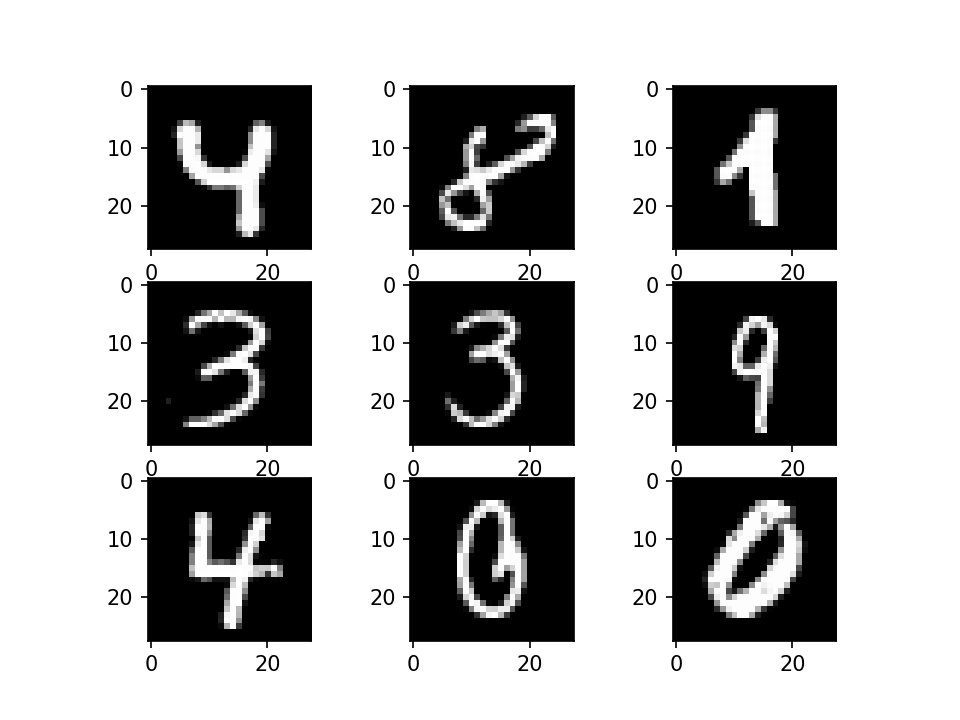

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.subplot(331)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(332)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(333)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(334)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(335)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(336)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(337)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(338)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.subplot(339)
random_index=np.random.randint(1,len(x_train))
plt.imshow(x_train[random_index],cmap='gray')
plt.show()

## 04_数据预处理

In [4]:
## tf框架cnn网络处理图片的时候，一定要去制定图像的类型（灰度，彩色图）
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
## 数据归一化
x_train=x_train/255.0
x_test=x_test/255.0
print("训练集的训练数据维度{}".format(x_train.shape))
print("测试集的训练数据维度{}".format(x_test.shape))


训练集的训练数据维度(60000, 28, 28, 1)
测试集的训练数据维度(10000, 28, 28, 1)


In [5]:
## 数据结果标签独热编码
y_train=np.eye(10)[y_train]
y_test=np.eye(10)[y_test]

In [6]:
print("训练集的结果标签维度{}".format(y_train.shape))
print("测试集的结果标签维度{}".format(y_test.shape))

训练集的结果标签维度(60000, 10)
测试集的结果标签维度(10000, 10)


## 创建CNN的网络模型
input-->Conv-->ReLU-->Pool-->Conv-->ReLU-->Pool-->FC-->Output

* 输入（28,28,1）灰度图
* Conv（3,3） 16层
* Relu
* maxpooling
* Conv（3,3） 32层
* Relu
* Flatten
* Dense（10）
* softmax

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [8]:
model=Sequential()
# 第一层卷积，卷积核3*3，特征提取器的数量是16，激活函数是relu
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

In [9]:
# 降采样，把图像的大小变成原来的1/4
model.add(MaxPool2D(pool_size=(2,2)))

In [10]:
# 第二层卷积
model.add(Conv2D(32,(3,3),activation='relu'))

In [11]:
# 降维打击，数据打平，转换成特征向量11*11*32=3872
model.add(Flatten())
# 全连接层，隐藏层神经元数量是200
model.add(Dense(200,activation='relu'))
# 输出层
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               774600    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 781,410
Trainable params: 781,410
Non-trainable params: 0
__________________________________________________

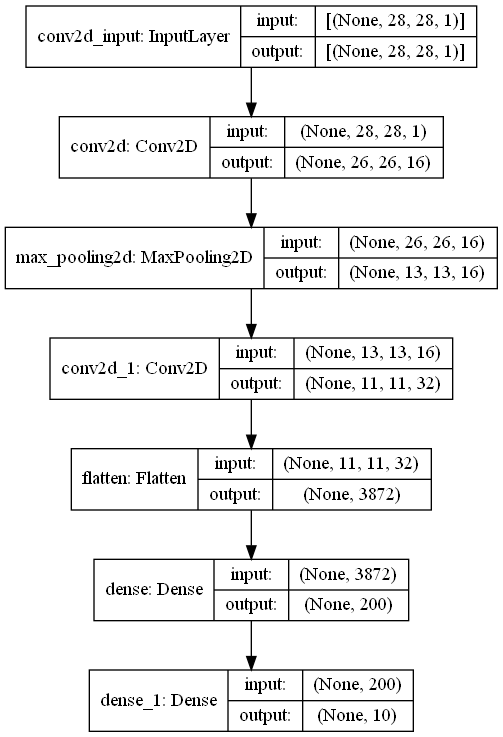

In [12]:
# 模型可视化
# !pip install pydot
# graphviz:
# ('You must install pydot (`pip install pydot`) and install graphviz 
#(see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
# Windows 安装把安装路径bin目录添加到环境变量
# Linux：sudo apt-get install graphviz
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)

## 模型编译

In [17]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy','mse'])

## 模型训练

In [18]:
model.fit(x_train,y_train,batch_size=100,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
600/600 [==============================] - 17s 27ms/step - loss: 0.1534 - accuracy: 0.9533 - mse: 0.0070 - val_loss: 0.0463 - val_accuracy: 0.9842 - val_mse: 0.0023
Epoch 2/10
600/600 [==============================] - 21s 34ms/step - loss: 0.0471 - accuracy: 0.9854 - mse: 0.0022 - val_loss: 0.0352 - val_accuracy: 0.9879 - val_mse: 0.0017
Epoch 3/10
600/600 [==============================] - 20s 33ms/step - loss: 0.0304 - accuracy: 0.9906 - mse: 0.0014 - val_loss: 0.0421 - val_accuracy: 0.9859 - val_mse: 0.0021
Epoch 4/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0204 - accuracy: 0.9939 - mse: 9.7118e-04 - val_loss: 0.0379 - val_accuracy: 0.9876 - val_mse: 0.0018
Epoch 5/10
600/600 [==============================] - 22s 36ms/step - loss: 0.0147 - accuracy: 0.9952 - mse: 7.0989e-04 - val_loss: 0.0318 - val_accuracy: 0.9903 - val_mse: 0.0015
Epoch 6/10
600/600 [==============================] - 20s 34ms/step - loss: 0.0105 - accuracy: 0.9968 - mse: 4.9